## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [2]:
student_df = pd.read_csv('students-data.csv', delimiter= ';')

In [3]:
#Printing the head
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
#5 point summary
student_df.describe(include = 'all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [5]:
#Reseting the index
student_df.reset_index(inplace=True)
#Renaming the index column as number
student_df.rename(columns = {'index' : 'number'}, inplace = True)
#Setting the number column as index
student_df.set_index('number', inplace=True)

In [6]:
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
#Checking for missing values
list(student_df.isna().sum()[student_df.isna().sum() != 0])

[]

**There are no missing values. No columns have to be dropped**

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [8]:
print('Number of categorical columns = ',student_df.select_dtypes(include = ['object']).shape[1])
print('List of categorical columns:')
list(student_df.select_dtypes(include = ['object']).columns)

Number of categorical columns =  17
List of categorical columns:


['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [9]:
#Finding list of columns where variance is less than 1
var_less_one = list(student_df.var()[student_df.var() < 1].index)
var_less_one

['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc']

In [10]:
#Dropping these columns
student_df.drop(columns=var_less_one, inplace=True)

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [11]:
#Importing the LabelEncoder package
from sklearn.preprocessing import LabelEncoder

#Creating the label Encoder Object
le = LabelEncoder()

#Creating a loop to encode the categorical variables
for feature in student_df.select_dtypes(include = ['object']).columns:
    student_df[feature] = le.fit_transform(student_df[feature])

In [12]:
student_df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10
5,0,1,16,1,1,1,4,3,3,2,...,1,1,0,2,2,5,10,15,15,15
6,0,1,16,1,1,1,2,2,2,2,...,1,1,0,4,1,3,0,12,12,11
7,0,0,17,1,0,0,4,4,2,4,...,1,0,0,4,1,1,6,6,5,6
8,0,1,15,1,1,0,3,2,3,2,...,1,1,0,2,1,1,0,16,18,19


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [13]:
#Creating a function to make the grade binary
#Pass = 1, Fail = 0
def binary_grade(grade):
    if(grade >= 10):
        return 1 #pass
    else:
        return 0 #fail

In [14]:
#Applying the function on my columns
student_df['G1'] = student_df['G1'].apply(binary_grade)
student_df['G2'] = student_df['G2'].apply(binary_grade)
student_df['G3'] = student_df['G3'].apply(binary_grade)

In [15]:
#Looking at the head of the data
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [16]:
#Creating the feature set
X = student_df.iloc[:,0:student_df.shape[1]-2]

#Creating the target set
Y = student_df['G3']

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

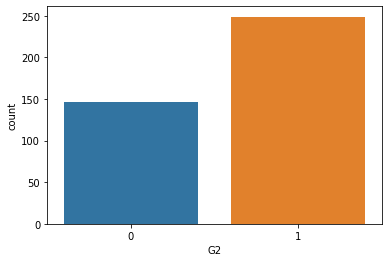

In [17]:
#Distribution of pass and fail across G2
sns.countplot(student_df['G2'])

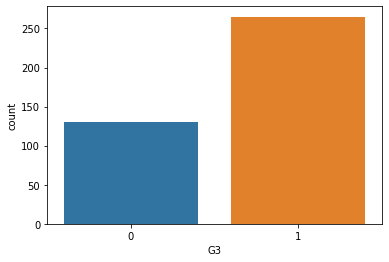

In [18]:
#Distribution of pass and fail across G3
sns.countplot(student_df['G3'])

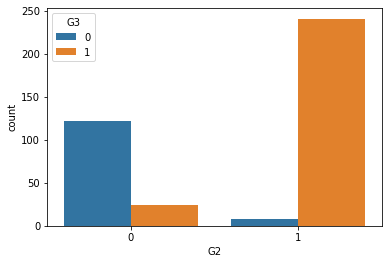

In [19]:
#Looking at their combination
sns.countplot(x = 'G2', hue = 'G3', data = student_df)

**Insight: We can see that in most cases when g2 is zero then g3 is also zero and similarly when g2 is one.**


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

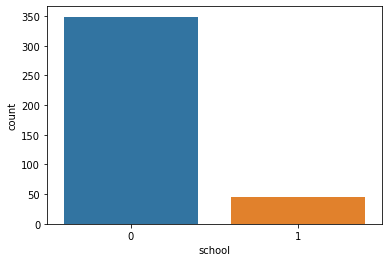

In [20]:
#Distribution of students across schools
sns.countplot(x = 'school', data = student_df)

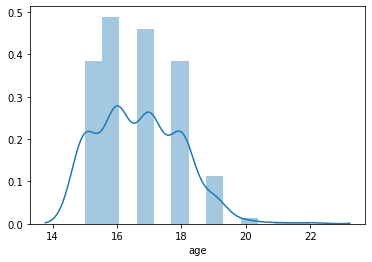

In [21]:
#Age distribution
sns.distplot(student_df['age'])

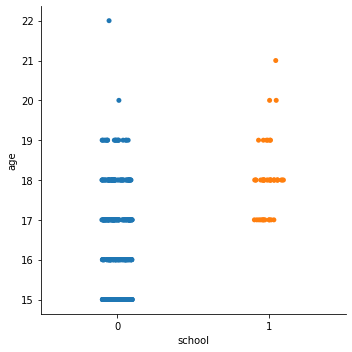

In [22]:
#Distribution of age in different schools
sns.catplot(x = 'school', y = 'age', data = student_df)

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 95, random_state = 1)

In [24]:
print('No. of rows in my training set = ', X_train.shape[0])

No. of rows in my training set =  300


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [26]:
#Creating the logistic regression model
Lr = LogisticRegression()
#Fitting the model on the training data
Lr.fit(X_train, y_train)
#Predicting the model on the test and training set
y_pred_train = Lr.predict(X_train)
y_pred_test = Lr.predict(X_test)

C:\Users\varun.siva\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
#Getting the accuracy scores of the training and testing sets
print('Accuracy score on the train data = %.2f'%accuracy_score(y_train, y_pred_train))
print('Accuracy score on the test data = %.2f'%accuracy_score(y_test, y_pred_test))

Accuracy score on the train data = 0.86
Accuracy score on the test data = 0.82


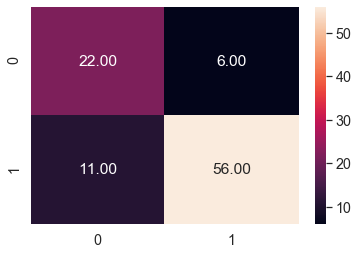

In [28]:
#Plotting the confusion matrix
sns.set(font_scale= 1.3)
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot = True, fmt = '.2f')

In [29]:
#Getting the classification report on the training and testing sets
print('Classification report on the training set: \n\n',classification_report(y_train, y_pred_train))
print('Classification report on the testing set: \n\n',classification_report(y_test, y_pred_test))

Classification report on the training set: 

               precision    recall  f1-score   support

           0       0.79      0.78      0.79       102
           1       0.89      0.89      0.89       198

    accuracy                           0.86       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.86      0.86      0.86       300

Classification report on the testing set: 

               precision    recall  f1-score   support

           0       0.67      0.79      0.72        28
           1       0.90      0.84      0.87        67

    accuracy                           0.82        95
   macro avg       0.78      0.81      0.79        95
weighted avg       0.83      0.82      0.82        95



# Naive bayes with Iris data

### Import Iris.csv

In [30]:
#loading the dataset
iris_df = pd.read_csv('Iris.csv')

In [31]:
#Exploring the dataset
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


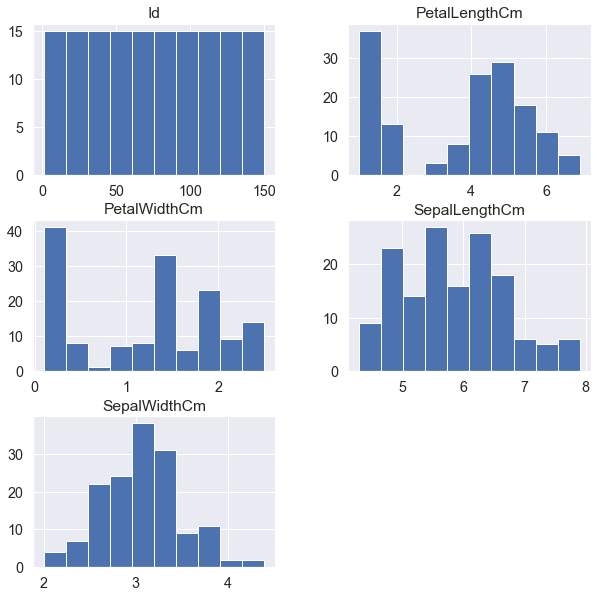

In [36]:
#Looking at histogram
iris_df.hist(figsize=(10,10))
plt.show()

In [37]:
#Looking for null values
iris_df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**There is no missing data**

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [42]:
#Getting the feature set
X = iris_df.iloc[:,0:5]
#Getting the test set
y = iris_df['Species']

### Find the distribution of target variable (Class)

In [44]:
#Getting the value counts
iris_df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

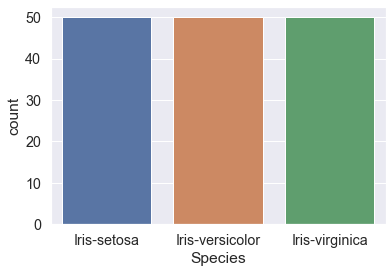

In [43]:
#Using a countplot
sns.countplot(iris_df['Species'])

**Looks like the classes are equally distributed**

### Plot the distribution of target variable using histogram

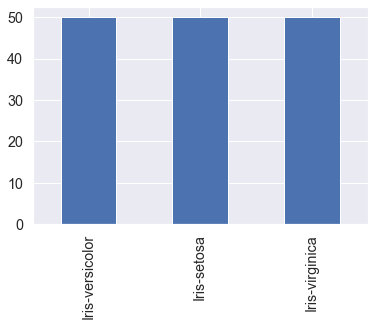

In [46]:
pd.value_counts(iris_df["Species"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

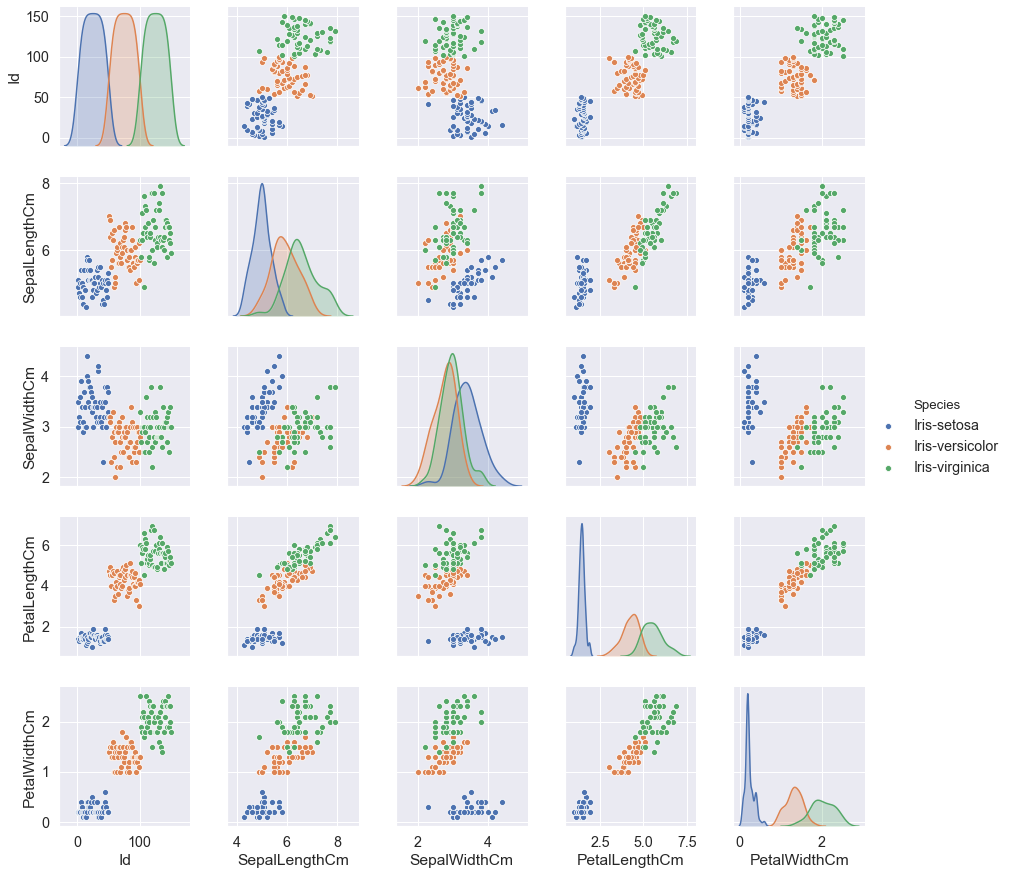

In [51]:
sns.pairplot(iris_df, kind = 'scatter', hue = 'Species')

### Insights:
1. PetalWidthcm: Iris-virginica has a typically higher petal width followed by versicolor and lastly setosa
2. PetalLengthcm: Virginica has a higher petal length followed by versicolor and lastly setosa
3. PetalWidth and PetalLength have a high positive correlation
4. Sepal length and Petal length also seem to have a high positive correlation
5. Virginica seems to have the highest values for most of these attributes

### Summary Statistics and explain insights for at least 2 variables

In [54]:
iris_df.skew()

Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [52]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Insights:
1. The SepalLengthCm seems to be normally distributed as it has a very similar mean and median
2. PetalLength seems to be slightly left skewed as it has a lower mean compared to the median
3. PetalWidth also seems to be slightly left skewed as it has a lower mean compared to the median
4. There do not seem to be any outliers in the columns
5. There are no missing values in any of the columns
6. All columns are more or less normally distributed.

### Correlation among all variables and give your insights

In [67]:
le.classes_[0]

'Iris-setosa'

In [68]:
#Label Encoding the Species Column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris_df['New_Species'] = le.fit_transform(iris_df['Species'])
print('Legend: 0 = {}, 1 = {}, 2 = {} '.format(le.classes_[0],le.classes_[1],le.classes_[2]))

Legend: 0 = Iris-setosa, 1 = Iris-versicolor, 2 = Iris-virginica 


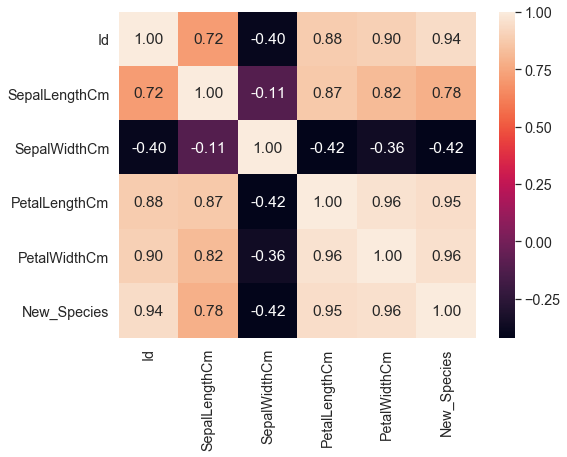

In [65]:
#Plotting the correlation matrix
sns.set(font_scale = 1.3)
plt.figure(figsize = (8,6))
sns.heatmap(iris_df.corr(), annot = True, fmt = '.2f')

### Insights:
1. The target variable is New_Species
2. PetalWidth and PetalLength seem to have a very high correlation with the target variable
3. PetalWidth and Petallength also have a very high correlation with each other
4. This suggests that we should take only one of the columns, either PetalWidth or Petallength, not both.
5. SepalWidth is inversely correlated with the target variable and is relatively less correlated than the other variables

### Split data in Training and Validation in 80:20

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

### Do Feature Scaling

In [70]:
from scipy.stats import zscore
X_train_scaled = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)

### Train and Fit NaiveBayes Model

In [71]:
#Importing the library
from sklearn.naive_bayes import GaussianNB

In [72]:
#Creating the NB object
Nb = GaussianNB()
#Fitting the model on the training set
Nb.fit(X_train, y_train)
#Predicting 
y_pred_train = Nb.predict(X_train)
y_pred_test = Nb.predict(X_test)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [74]:
#Printing the accuracy
print('Accuracy on the test set = %.2f'%accuracy_score(y_test, y_pred_test))
print('Accuracy on the train set = %.2f'%accuracy_score(y_train, y_pred_train))

Accuracy on the test set = 1.00
Accuracy on the train set = 0.99


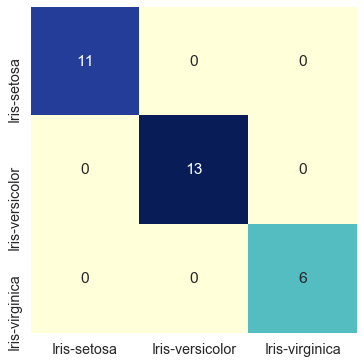

In [130]:
#Printing the confusion matrix
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot = True, fmt = 'd',
           cmap = 'YlGnBu',xticklabels=list(le.classes_), yticklabels=list(le.classes_), cbar = False,
           square=True)
plt.show()

**The Naive Bayes Model was able to correctly predict 100% of the test data**

-----